In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, balanced_accuracy_score

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

## Splitting in train and test set.

In [3]:
X= df[['red','green','blue','gray','gray_var','edges','ridges']]
y=df['group']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_val : ')
print(X_val.head())
print(X_val.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_val : ')
print(y_val.head())
print(y_val.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)



#Split: 70% train, 10% validation and 20% test.

X_train : 
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   

                                                    gray  gray_var  edges  \
data/12910/0/12910_idx5_x3001_y701_class0.png   0.755730  0.003960     83   
data/12910/0/12910_idx5_x1501_y401_class0.png   0.483340  0.009377    350   
data/12910/0/12910_idx5_x2251_y1101_class0.png  0.799321  0.001401     14   
data/12910/0/12910_idx5_x2551_y1151_class0.png  0.824825  0.001107      0   
data/12910/0/12910_idx5_x2001_y101_class0.png   0.675241  0.005805    187   

                                                ridges  
data/12910/0/12910_idx5_

## Single decision tree classifier

Accuracy and balancend accuracy for max_depth of 1 is: 0.6743775447699348 , 0.6910898622593671
Accuracy and balancend accuracy for max_depth of 2 is: 0.7307678449176666 , 0.6279309405299985
Accuracy and balancend accuracy for max_depth of 3 is: 0.7611069073613663 , 0.6324538093264291
Accuracy and balancend accuracy for max_depth of 4 is: 0.7845277987965265 , 0.6755620317682303
Accuracy and balancend accuracy for max_depth of 5 is: 0.7894281699275754 , 0.6556362113575418
Accuracy and balancend accuracy for max_depth of 6 is: 0.7789067848520881 , 0.6725507266021542
Accuracy and balancend accuracy for max_depth of 7 is: 0.7786905920080712 , 0.6923540581623155
Accuracy and balancend accuracy for max_depth of 8 is: 0.7880589485821352 , 0.6908705346625522
Accuracy and balancend accuracy for max_depth of 9 is: 0.7859690844233056 , 0.6954887484388006
Accuracy and balancend accuracy for max_depth of 10 is: 0.7940402839332684 , 0.6957826363219817
Accuracy and balancend accuracy for max_depth of 

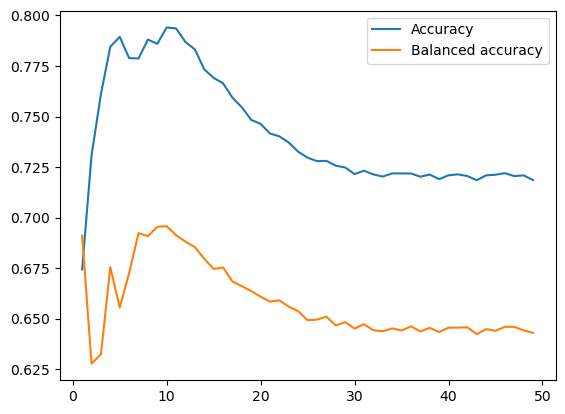

In [18]:
#Single decision tree with different depths, to see what is proper.
acc_for_depths = []
bal_accs = []

st = time.time()
for d in range(1,50):
    model = DecisionTreeClassifier(max_depth = d)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = model.score(X_val, y_val)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
    acc_for_depths.append(accuracy)
    bal_accs.append(balanced_accuracy)
    print(f'Accuracy and balancend accuracy for max_depth of {d} is: {accuracy} , {balanced_accuracy}')
    
et = time.time()
elapsed_time = et - st
print(f'Execution time: {elapsed_time}s')
    
plt.plot(range(1,50), acc_for_depths, label='Accuracy')
plt.plot(range(1,50), bal_accs, label='Balanced accuracy')
plt.legend()
plt.show()
#Observing in the plot that max_depth = 11 gives the highest accuracy when validating.

### Final test of decision tree with max_depth = 10

Accuracy for max_depth of 10 is: 0.7990991802540311
Balanced accuracy for max_depth of 10 is: 0.7284824557294114
Execution time: 2.8073630332946777s


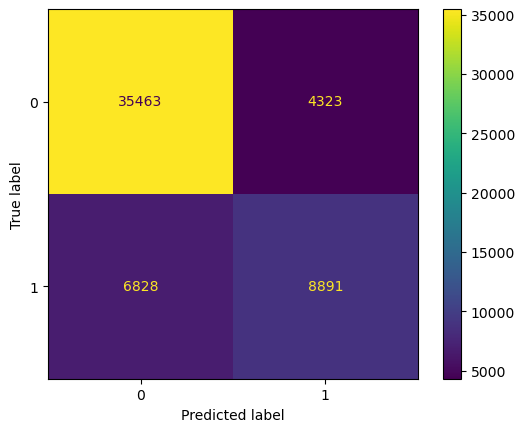

In [32]:
st = time.time()
depth = 10
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)

predicted_value = model.predict(X_test)

#To plot the actual decision tree
#tree.plot_tree(model)

accuracy = model.score(X_test, y_test)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_value)

print(f'Accuracy for max_depth of {depth} is: {accuracy}')
print(f'Balanced accuracy for max_depth of {depth} is: {balanced_accuracy}')
    
et = time.time()
elapsed_time = et - st
print(f'Execution time: {elapsed_time}s')

ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_value)).plot()

## Random forest classifier

Accuracy and balancend accuracy for max_depth of 1 is: 0.7875544986127626 , 0.5
Accuracy and balancend accuracy for max_depth of 2 is: 0.7875544986127626 , 0.5
Accuracy and balancend accuracy for max_depth of 3 is: 0.7954455374193781 , 0.5271798064624946
Accuracy and balancend accuracy for max_depth of 4 is: 0.7934277375418873 , 0.6494436957592056
Accuracy and balancend accuracy for max_depth of 5 is: 0.7951933124346917 , 0.6670372772410083
Accuracy and balancend accuracy for max_depth of 6 is: 0.7955536338413866 , 0.6743257479587468
Accuracy and balancend accuracy for max_depth of 7 is: 0.7944006053399633 , 0.6834401561301786
Accuracy and balancend accuracy for max_depth of 8 is: 0.7956256981227254 , 0.6895436859259543
Accuracy and balancend accuracy for max_depth of 9 is: 0.7977515944222247 , 0.691326858979568
Accuracy and balancend accuracy for max_depth of 10 is: 0.7973912730155298 , 0.6920889359534396
Accuracy and balancend accuracy for max_depth of 11 is: 0.7993370086116817 , 0.6

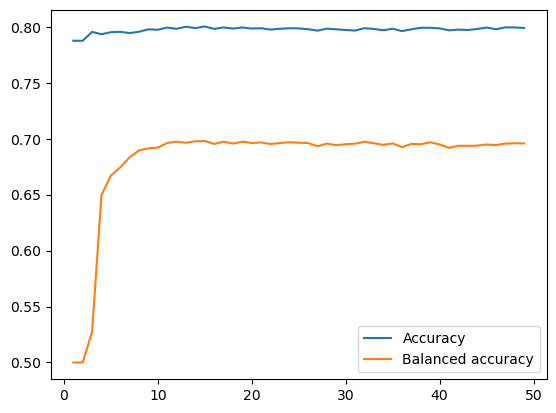

In [22]:
#Random forest classification with different values for max_depth
acc_for_depths = []
bal_accs = []
for i in range(1,50):
    model = RandomForestClassifier(max_depth = i)

    # fit the regressor with x and y data
    model.fit(X_train, y_train) 

    y_pred = model.predict(X_val)  # test the output by changing values
    #print(y_pred)

    #print("accuracy on training set: %f" % regressor.score(X_train, y_train))
    #print("accuracy on validation set: %f" % regressor.score(X_val, y_val))

    # Create confusion matrix
    #confusion = confusion_matrix(y_val, y_pred)
    #ConfusionMatrixDisplay(confusion).plot()
    # Display accuracy score
    accuracy = model.score(X_val, y_val)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
    print(f'Accuracy and balancend accuracy for max_depth of {i} is: {accuracy} , {balanced_accuracy}')
    acc_for_depths.append(accuracy)
    bal_accs.append(balanced_accuracy)
    
plt.plot(range(1,50), acc_for_depths, label='Accuracy')
plt.plot(range(1,50), bal_accs, label='Balanced accuracy')
plt.legend()
plt.show()

### Final test of random forest

Accuracy and balanced accuracy for random forest with max_depth = 15: 0.8034951806143591 , 0.7305675493670385


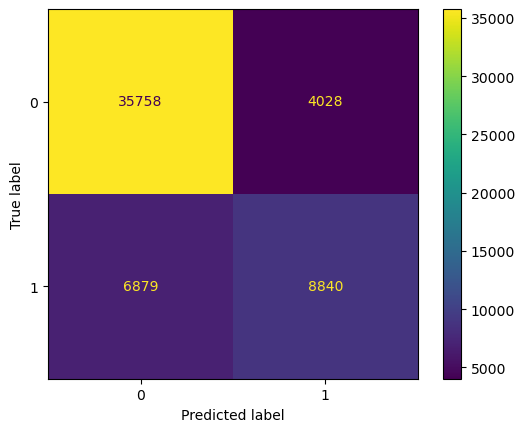

In [24]:
depth = 15 #As found optimal above
model = RandomForestClassifier(max_depth = depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Accuracy and balanced accuracy for random forest with max_depth = {depth}: {accuracy} , {balanced_accuracy}')

# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()

### Feature importance for the random forest

(0.0, 1.0)

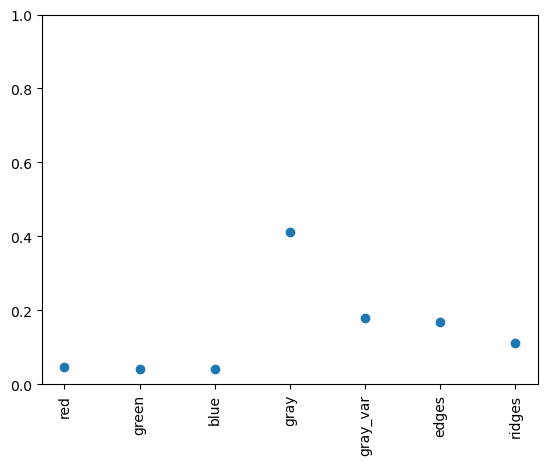

In [25]:
plt.plot(model.feature_importances_, 'o')
plt.xticks(range(X_test.shape[1]), X_test.columns, rotation=90)
plt.ylim(0, 1)